In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("responses.csv")
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
#Load the data and extract the relevant columns.
#Relevant Columns will be Finances, Gender, Village-Town and Healthy Eating
df2 = df[['Finances','Gender','Village - town','Healthy eating']]
df2.head()

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0


In [4]:
#Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights
#Missing Value
F=df2.isna().sum()
F                          #box is reexcuted - since the missing values(numericals only) are replaced with median finance and healty eating as 0

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

Yes we have some missing values in the dataset

In [5]:
#filing the missing values with the mode operator
df2.fillna(df2['Gender'].mode()[0],inplace = True)  #here the Gender values are replaced in other 
                                                    #nulls values of the other columns and we cannot follow this method
print(df2.isna().sum())

Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64


C:\Users\Nachiappan\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [12]:
#creating a new dataset to replace the null values
df3 = df[['Finances','Gender','Village - town','Healthy eating']]
df3.head()

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0


In [13]:
df3.isnull().sum()

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

In [14]:
df3['Gender'].fillna(df3['Gender'].mode()[0],inplace = True)  #Removing the values missing values from the columns 
                                                               #individually with mode operator
print(df3.isna().sum())

Finances          3
Gender            0
Village - town    4
Healthy eating    3
dtype: int64


In [15]:
#removing the missing values

df3['Finances'].fillna(df3['Finances'].mode()[0],inplace = True) 
df3['Village - town'].fillna(df3['Village - town'].mode()[0],inplace = True) 
df3['Healthy eating'].fillna(df3['Healthy eating'].mode()[0],inplace = True) 
print(df3.isna().sum())

Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64


In [16]:
#Method to discard the missing values
res = df[['Finances','Gender','Village - town','Healthy eating']]


In [17]:
#discarding the missing values creating a new dataset with not null values leaving the null values for further analysis
res = res[(res['Village - town'].isnull() == False) & (res['Gender'].isnull() == False) & (res['Finances'].isnull() == False) &
        (res['Healthy eating'].isnull() == False)]

In [18]:
res.isna().sum()

Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64

In [19]:
#analysis of the dataset
res.reset_index(drop=True, inplace=True)

In [20]:
res.index

RangeIndex(start=0, stop=994, step=1)

In [21]:
#Gender and Village town are the caterogical columns, hence mapping the columns against - 

import seaborn as sns
sns.pairplot(res, hue='Gender')

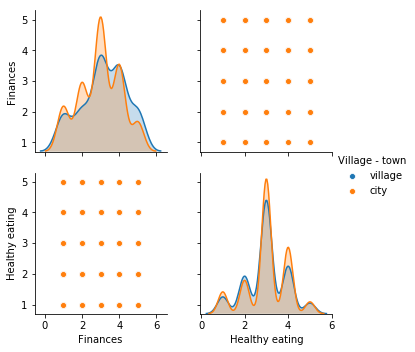

In [22]:
import seaborn as sns
sns.pairplot(res, hue='Village - town')

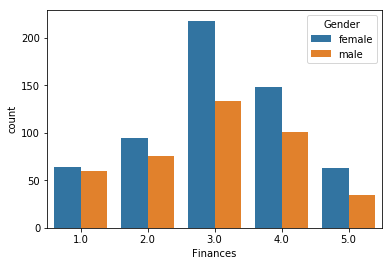

In [23]:
sns.countplot(x="Finances", data=res, hue="Gender")  #using countplot for finding the count of the data against the categorical variable

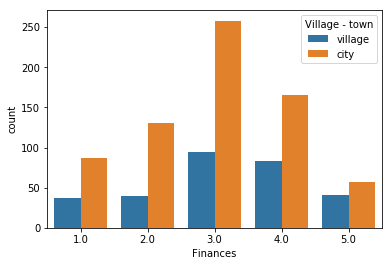

In [24]:
#using countplot for finding the count of the data against the categorical variable
sns.countplot(x="Finances", data=res, hue="Village - town")

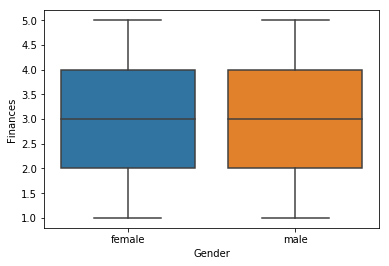

In [25]:
sns.boxplot(x = 'Gender', y='Finances', data = res)

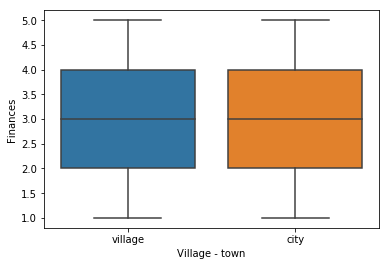

In [17]:
sns.boxplot(x = 'Village - town', y='Finances', data = res)

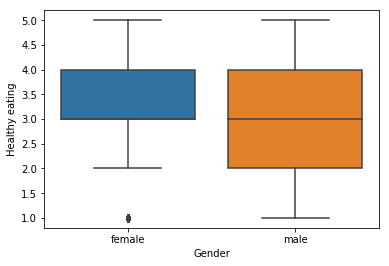

In [18]:
sns.boxplot(x = 'Gender', y='Healthy eating', data = res)

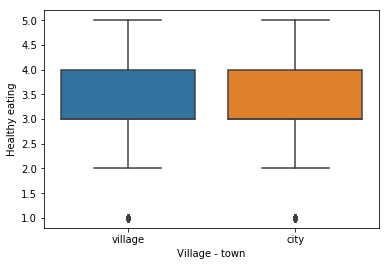

In [19]:
sns.boxplot(x = 'Village - town', y='Healthy eating', data = res)

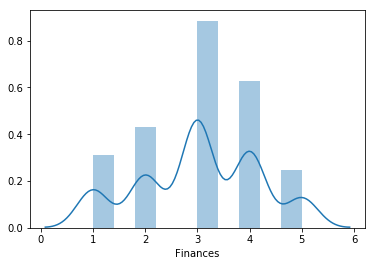

In [31]:
sns.distplot(res['Finances'])

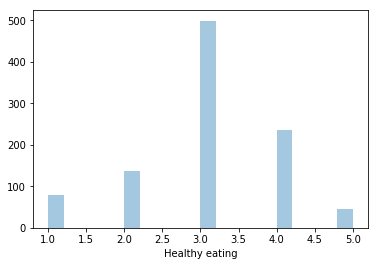

In [33]:
sns.distplot(res['Healthy eating'],kde = False)

In [36]:
print("in both cases most people rated medium 3 on  I live a very healthy lifestyle and I save all the money I can.")

in both cases most people rated medium 3 on  I live a very healthy lifestyle and I save all the money I can.


In [20]:
print("There are outliers in healty eating  village and town, female healthy eating.")
print("These are ratings and has significant count, I am keeping the outliers.")

There are outliers in healty eating  village and town, female healthy eating.
These are ratings and has significant count, I am keeping the outliers.


In [23]:
df1 = res.groupby(['Gender'])
df1.count()

,Finances,Village - town,Healthy eating
Gender,,,
female,588,588,588
male,406,406,406


In [24]:
df1 = res.groupby(['Village - town'])
df1.count()

,Finances,Gender,Healthy eating
Village - town,,,
city,699,699,699
village,295,295,295


In [29]:
F = res.groupby(['Healthy eating'])
F.count()

,Finances,Gender,Village - town
Healthy eating,,,
1.0,79,79,79
2.0,136,136,136
3.0,499,499,499
4.0,235,235,235
5.0,45,45,45


In [26]:
print(res[res["Healthy eating"] == 1].groupby("Village - town").count())
print(res[res["Healthy eating"] == 1].groupby("Gender").count())

                Finances  Gender  Healthy eating
Village - town                                  
city                  57      57              57
village               22      22              22
        Finances  Village - town  Healthy eating
Gender                                          
female        35              35              35
male          44              44              44


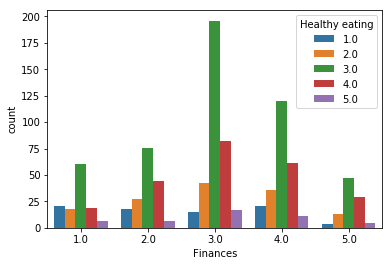

In [35]:
sns.countplot(x='Finances', data=res, hue='Healthy eating')

In [39]:
res['Gender'].value_counts()

female    588
male      406
Name: Gender, dtype: int64

1. Is saving money Gender dependent

Null hypothesis: 𝐻0 : There is no difference in saving money by male and female

Alternative hypothesis: 𝐻𝐴 : There is a significant difference in saving money by male and female


In [63]:
Finances_male = res[res['Gender'] == 'male']['Finances']          #Finances_Male - Variable is created - Gender "male" 
                                                                      #records are picked against the finances

In [42]:
Finances_male.head()

5     2.0
7     3.0
15    3.0
18    4.0
19    2.0
Name: Finances, dtype: float64

In [64]:
Finances_female = res[res['Gender'] == 'female']['Finances']           #Finances_Male - Variable is created - Gender "female" 
                                                                      #records are picked against the finances

In [45]:
Finances_female.head()

0    3.0
1    3.0
2    2.0
3    2.0
4    4.0
Name: Finances, dtype: float64

In [65]:
from scipy import stats
t_stats, p_value = stats.ttest_ind(Finances_female, Finances_male)
print(t_stats)
print(p_value)

2.0062088685036774
0.045105045334690154


since p_value < 0.05 % rejecting the null hypothesis
There is sufficient evidence to prove that there is a significant difference in saving money by male and female

2. Is there any differences in money saving (finances) between people from city or village?

Null hypothesis: 𝐻0 : There is no difference in saving money by people from city and village

Alternative hypothesis: 𝐻𝐴 : There is a significant difference in saving money by people from city and village


In [66]:
Finances_city = res[res['Village - town'] == 'city']['Finances']
Finances_village = res[res['Village - town'] == 'village']['Finances']

In [67]:
t, p = stats.ttest_ind(Finances_city, Finances_village)
print(t)
print(p)

-2.6268674440952453
0.00875037049850486


since p_value < 0.05 % rejecting the null hypothesis There is sufficient evidence to prove that There is a significant difference in saving money by people from city and village

In [68]:
print('t stats is in -ve, so village people people from village saving money is greater than city.')

t stats is in -ve, so village people people from village saving money is greater than city.


3. Do Women have a Healthier Lifestyle than Men?

Null hypothesis: 𝐻0 : There is no difference in Healthier Lifestyle by Male and Female

Alternative hypothesis: 𝐻𝐴 : There is a significant difference in Healthier Lifestyle by Male and Female

In [69]:
Healthier_male = res[res['Gender'] == 'male']['Healthy eating']
Healthier_female = res[res['Gender'] == 'female']['Healthy eating']

In [70]:
t, p = stats.ttest_ind(Healthier_male, Healthier_female)
print(t)
print(p)

-2.0528186963833432
0.04035203607645947


In [71]:
print('p value is less than 0.05 so reject null hyothesis.')
print('t stats value is -ve. so Yes, Woman have Healthier listyle than man')

p value is less than 0.05 so reject null hyothesis.
t stats value is -ve. so Yes, Woman have Healthier listyle than man


In [72]:
print(Healthier_male.mean())
print(Healthier_female.mean())

2.958128078817734
3.0816326530612246


4. Are Village People Healthier than City People?

Null hypothesis: 𝐻0 : There is no difference in Healthier Lifestyle by people from city and village

Alternative hypothesis: 𝐻𝐴 : There is a significant difference in Healthier Lifestyle by people from city and village


In [73]:
Healthier_city = res[res['Village - town'] == 'city']['Healthy eating']
Healthier_village = res[res['Village - town'] == 'village']['Healthy eating']

In [74]:
t, p = stats.ttest_ind(Healthier_city, Healthier_village)
print(t)
print(p)

0.9069412052684147
0.3646581368405325


In [75]:
print('p value is greater than 0.05 so failed to reject null hyothesis.')
print('t stats value is +ve side. so people from city have healthier life style than from village')

p value is greater than 0.05 so failed to reject null hyothesis.
t stats value is +ve side. so people from city have healthier life style than from village


In [76]:
print(Healthier_city.mean())
print(Healthier_village.mean())

3.048640915593705
2.989830508474576


Conclusion

In [77]:
print("though there is no significant difference in saving money between male and female, female are liking very healthier lifestyle than men.")
print("people from village are saving all the money that they can more than the people from city. But city people are liking the healthier lifestyle than village people. ")

though there is no significant difference in saving money between male and female, female are liking very healthier lifestyle than men.
people from village are saving all the money that they can more than the people from city. But city people are liking the healthier lifestyle than village people. 
